# Edge Detectors

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [3]:
path = r"images\sr2.jpg"

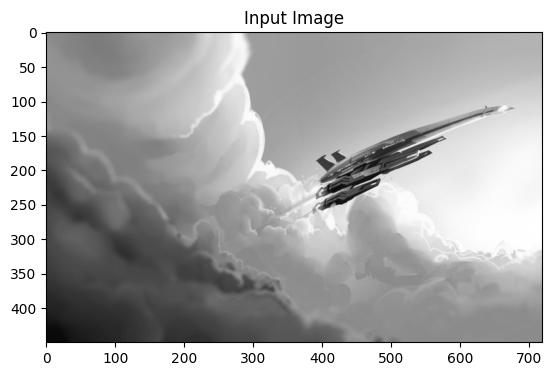

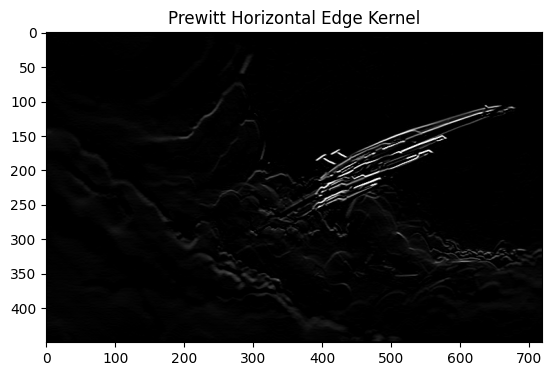

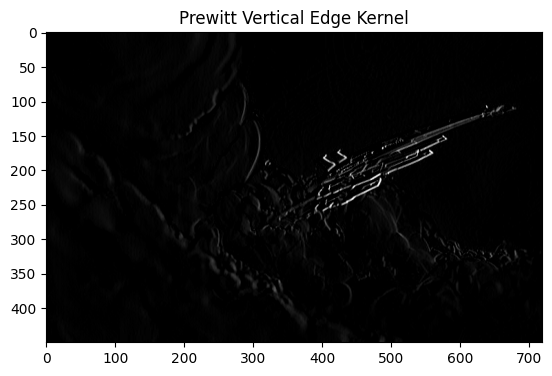

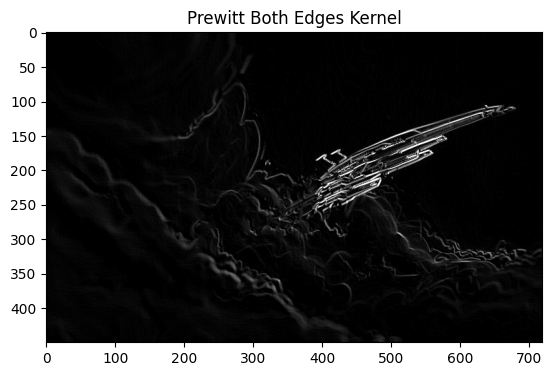

In [10]:
# Prewitt Edge Detector Operator

image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
x,y = gray.shape[:2]
plt.imshow(gray, 'gray')
plt.title('Input Image')
plt.show()
    
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

img2= cv2.GaussianBlur(gray,(5,5),0) #gaussian blur to remove noise

img_prewittx = cv2.filter2D(gray, -1, kernelx)#Horizontal
img_prewitty = cv2.filter2D(gray, -1, kernely)#Vertical
img_prewitt = img_prewittx + img_prewitty#Horizontal & Vertical
    
plt.imshow(img_prewittx, 'gray')
plt.title('Prewitt Horizontal Edge Kernel')
plt.show()

plt.imshow(img_prewitty, 'gray')
plt.title('Prewitt Vertical Edge Kernel')
plt.show()

plt.imshow(img_prewitt, 'gray')
plt.title('Prewitt Both Edges Kernel')
plt.show()


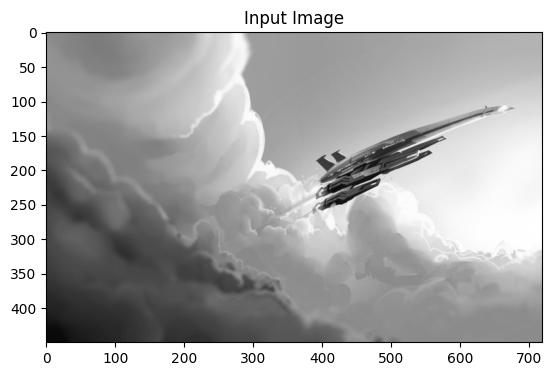

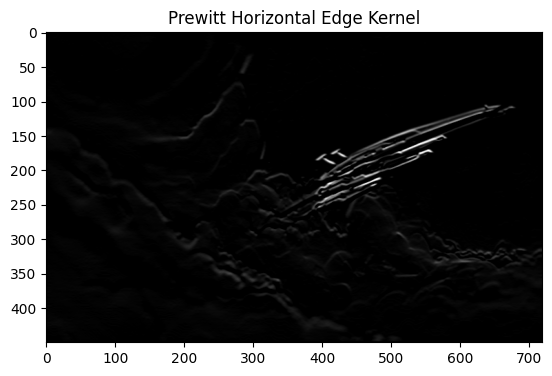

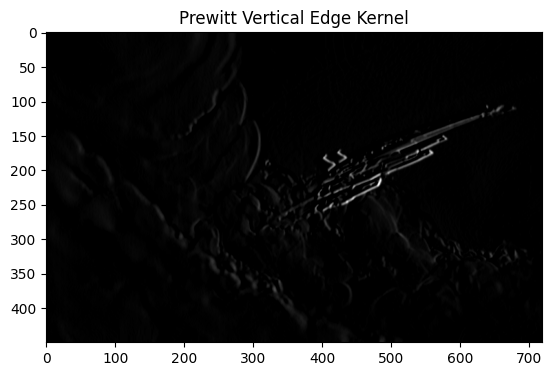

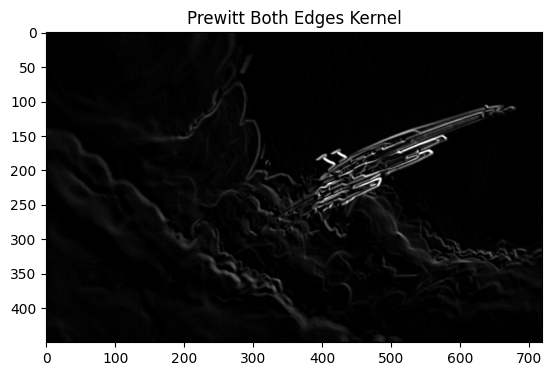

In [15]:
# Prewitt Edge Detector Operator

image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
x,y = gray.shape[:2]
plt.imshow(gray, 'gray')
plt.title('Input Image')
plt.show()
    
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image

img_prewittx = cv2.filter2D(img2, -1, kernelx)#Horizontal
img_prewitty = cv2.filter2D(img2, -1, kernely)#Vertical
img_prewitt = cv2.add(img_prewittx,img_prewitty) #Horizontal & Vertical
    
plt.imshow(img_prewittx, 'gray')
plt.title('Prewitt Horizontal Edge Kernel')
plt.show()

plt.imshow(img_prewitty, 'gray')
plt.title('Prewitt Vertical Edge Kernel')
plt.show()

plt.imshow(img_prewitt, 'gray')
plt.title('Prewitt Both Edges Kernel')
plt.show()


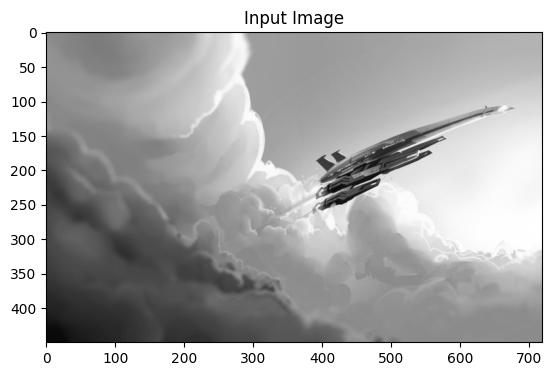

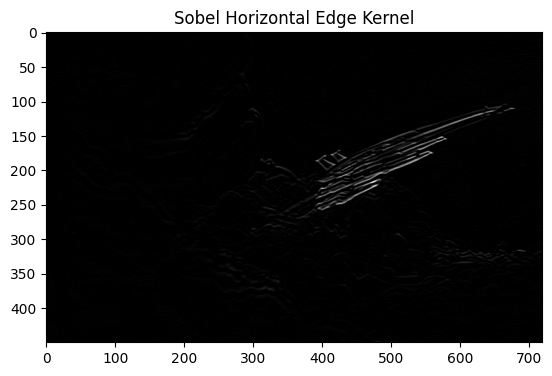

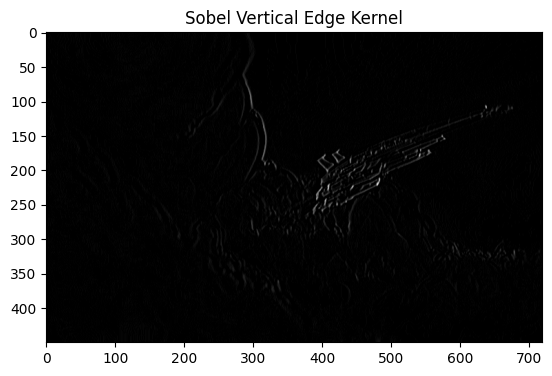

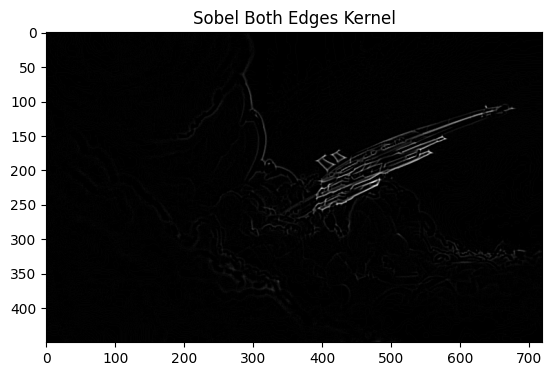

In [25]:
# Sobel Edge Detector Operator
# More robust against noise
# Supresses Non-maxiama edges
    
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
x,y = gray.shape[:2]
plt.imshow(gray, 'gray')
plt.title('Input Image')
plt.show()
 
img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image

# Sobel with 2nd order derivative performs much better (for my image atleast)

order_of_derivative = 2 # higher = more edges detected

img_sobelx = cv2.Sobel(img2,cv2.CV_8U,0,order_of_derivative,ksize=3) # 0,order of derivative in y directions
img_sobely = cv2.Sobel(img2,cv2.CV_8U,order_of_derivative,0,ksize=3) # order of derivative in x directions, 0
img_sobel = img_sobelx + img_sobely
    
plt.imshow(img_sobelx, 'gray')
plt.title('Sobel Horizontal Edge Kernel')
plt.show()

plt.imshow(img_sobely, 'gray')
plt.title('Sobel Vertical Edge Kernel')
plt.show()

plt.imshow(img_sobel, 'gray')
plt.title('Sobel Both Edges Kernel')
plt.show()



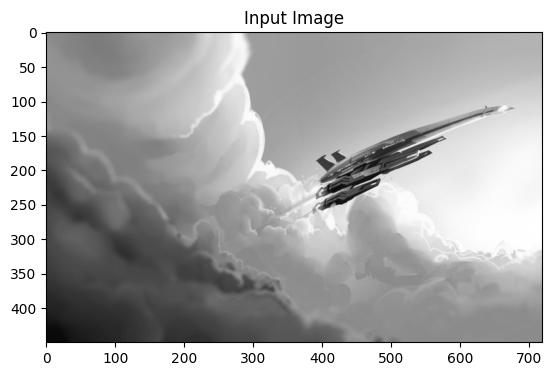

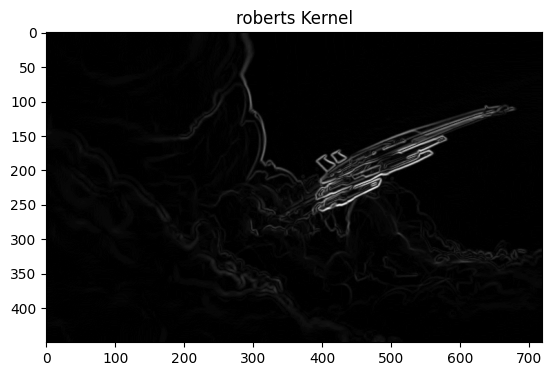

In [26]:
#  robert Operator for slanting edges

# This performs much better since our spacehsip/subject is tilted

image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
x,y = gray.shape[:2]
plt.imshow(gray, 'gray')
plt.title('Input Image')
plt.show()

kernel_Roberts_x = np.array([[1, 0],[0, -1]])
kernel_Roberts_y = np.array([[0, -1],[1, 0]])

img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image
x = cv2.filter2D(img2, cv2.CV_16S, kernel_Roberts_x)
y = cv2.filter2D(img2, cv2.CV_16S, kernel_Roberts_y)
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
roberts = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)


plt.imshow(roberts, 'gray')
plt.title('roberts Kernel')
plt.show()



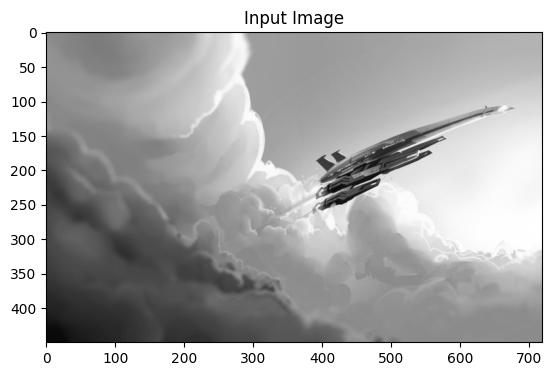

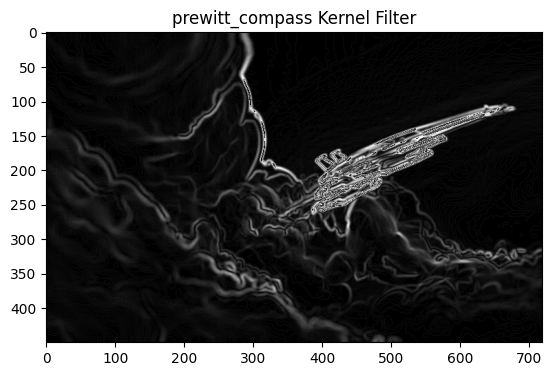

In [29]:
#  prewittcompass():

image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
x,y = gray.shape[:2]
plt.imshow(gray, 'gray')
plt.title('Input Image')
plt.show()


#kernels, rotating prewitt kernels so that we can capture slanting edges properly
prewitt1 = np.array ([[-1,-1,-1],[1,-2,1],[1,1,1]])
prewitt2 = np.array ([[-1,-1,1],[-1,-2,1],[1,1,1]])
prewitt3 = np.array ([[-1,1,1],[-1,-2,1],[-1,1,1]])
prewitt4 = np.array ([[1,1,1],[-1,-2,1],[-1,-1,1]])
prewitt5 = np.array ([[1,1,1],[1,-2,1],[-1,-1,-1]])
prewitt6 = np.array ([[1,1,1],[1,-2,-1],[1,-1,-1]])
prewitt7 = np.array ([[1,1,-1],[1,-2,-1],[1,1,-1]])
prewitt8 = np.array ([[1,-1,-1],[1,-2,-1],[1,1,1]])

img2= cv2.GaussianBlur(gray,(7,7),0)#gaussian Image
img_prewitt1 = cv2.filter2D(img2, -1, prewitt1)
img_prewitt2 = cv2.filter2D(img2, -1, prewitt2)
img_prewitt3 = cv2.filter2D(img2, -1, prewitt3)
img_prewitt4 = cv2.filter2D(img2, -1, prewitt4)
img_prewitt5 = cv2.filter2D(img2, -1, prewitt5)
img_prewitt6 = cv2.filter2D(img2, -1, prewitt6)
img_prewitt7 = cv2.filter2D(img2, -1, prewitt7)
img_prewitt8 = cv2.filter2D(img2, -1, prewitt8)

#Adding all the elements together to form an image
prewitt_compass = img_prewitt1 + img_prewitt2 + img_prewitt3 + img_prewitt4 + img_prewitt5 + img_prewitt6 + img_prewitt7 + img_prewitt8
    
    

plt.imshow(prewitt_compass, 'gray')
plt.title('prewitt_compass Kernel Filter')
plt.show()



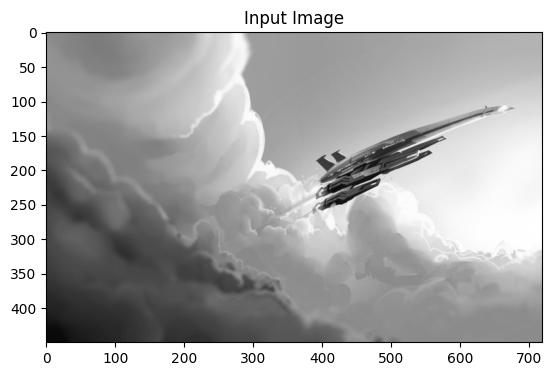

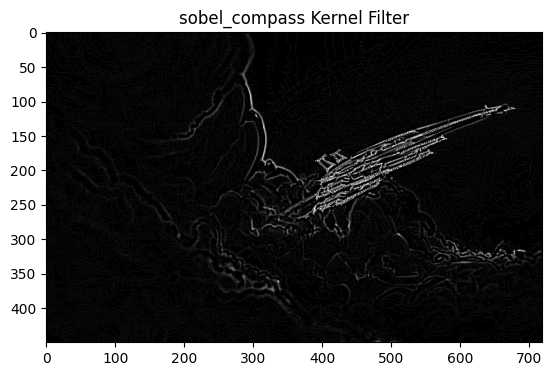

In [32]:

image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
x,y = gray.shape[:2]
plt.imshow(gray, 'gray')
plt.title('Input Image')
plt.show()


sobel1 = np.array([[-1,-2,-1],
                   [0,0,0],
                   [1,2,1]])

sobel2 = np.array([[-2,-1,0],
                    [-1,0,1],
                    [0,1,2]])

sobel3 = np.array([[-1,0,1],
                    [-2,0,2],
                    [-1,0,1]])

sobel4 = np.array([[0,1,2],
                   [-1,0,1],
                   [-2,-1,0]])

sobel5 = np.array([[1,2,1],
                    [0,0,0],
                    [-1,-2,-1]])

sobel6 = np.array([[2,1,0],
                    [1,0,-1],
                    [0,-1,-2]])

sobel7 = np.array([[1,0,-1],
                    [2,0,-2],
                    [1,0,-1]])

sobel8 = np.array([[0,-1,-2],
                    [1,0,-1],
                    [2,1,0]])


img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image

order_of_derivative = 2

img_sobel1 = cv2.Sobel(img2,cv2.CV_8U,order_of_derivative,0,ksize=3)
img_sobel2 = cv2.Sobel(img2,cv2.CV_8U,0,order_of_derivative,ksize=3)
img_sobel3 = cv2.Sobel(img2,cv2.CV_8U,order_of_derivative,0,ksize=3)
img_sobel4 = cv2.Sobel(img2,cv2.CV_8U,0,order_of_derivative,ksize=3)
img_sobel5 = cv2.Sobel(img2,cv2.CV_8U,order_of_derivative,0,ksize=3)
img_sobel6 = cv2.Sobel(img2,cv2.CV_8U,0,order_of_derivative,ksize=3)
img_sobel7 = cv2.Sobel(img2,cv2.CV_8U,order_of_derivative,0,ksize=3)
img_sobel8 = cv2.Sobel(img2,cv2.CV_8U,0,order_of_derivative,ksize=3)

#Add all the elements to form an image
sobel_compass = img_sobel1 + img_sobel2 + img_sobel3 + img_sobel4 + img_sobel5 + img_sobel6 + img_sobel7 + img_sobel8


plt.imshow(sobel_compass, 'gray')
plt.title('sobel_compass Kernel Filter')
plt.show()



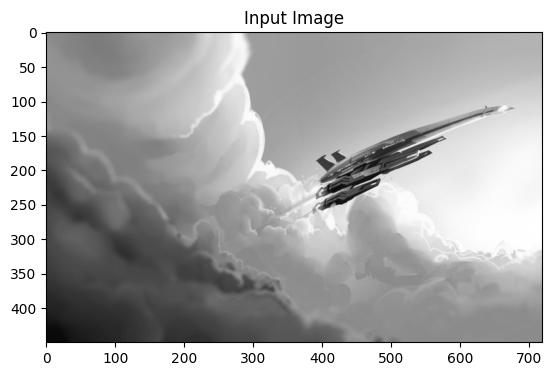

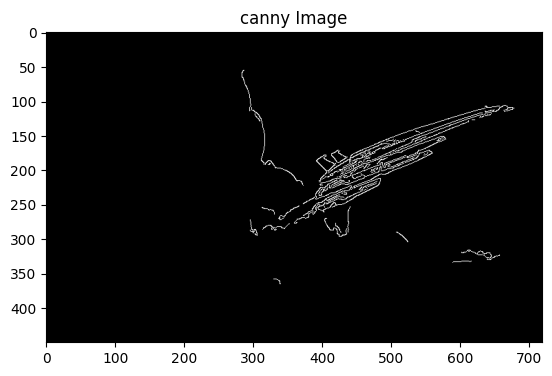

In [41]:
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, 'gray')
plt.title('Input Image')
plt.show()

canny_edges = cv2.Canny(gray,90,200)
plt.imshow(canny_edges, 'gray')
plt.title('canny Image')
plt.show()